In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from model import *

import json

[[0, 5], [10, 5], [20, 5], [30, 5], [40, 5], [50, 5], [60, 5], [70, 5], [80, 5], [90, 5], [100, 5], [110, 5], [120, 5], [130, 5], [140, 5], [150, 5]]
[30, 35, 40, 35, 50, 35, 60, 35, 70, 35, 80, 35, 90, 35, 100, 35, 110, 35, 120, 35, 130, 35, 140, 35, 150, 35, 160, 35, 170, 35, 180, 35]
[30, 30, 31, 30, 32, 30, 33, 30, 34, 30, 35, 30, 36, 30, 37, 30, 38, 30, 39, 30, 40, 30, 41, 30, 42, 30, 43, 30, 44, 30, 45, 30, 46, 30, 47, 30, 48, 30, 49, 30, 50, 30, 51, 30, 52, 30, 53, 30, 54, 30, 55, 30, 56, 30, 57, 30, 58, 30, 59, 30, 60, 30, 61, 30, 62, 30, 63, 30, 64, 30, 65, 30, 66, 30, 67, 30, 68, 30, 69, 30, 70, 30, 71, 30, 72, 30, 73, 30, 74, 30, 75, 30, 76, 30, 77, 30, 78, 30, 79, 30, 80, 30, 81, 30, 82, 30, 83, 30, 84, 30, 85, 30, 86, 30, 87, 30, 88, 30, 89, 30, 90, 30, 91, 30, 92, 30, 93, 30, 94, 30, 95, 30, 96, 30, 97, 30, 98, 30, 99, 30, 100, 30, 101, 30, 102, 30, 103, 30, 104, 30, 105, 30, 106, 30, 107, 30, 108, 30, 109, 30, 110, 30, 111, 30, 112, 30, 113, 30, 114, 30, 115, 30, 116, 30

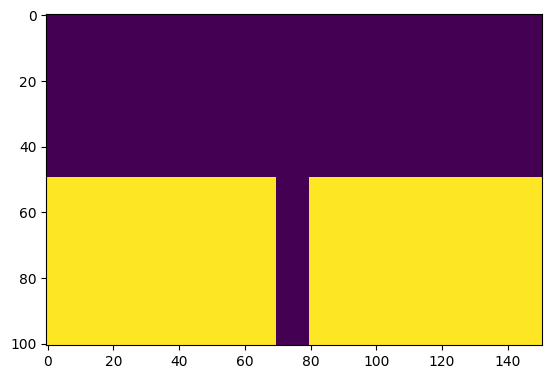

In [2]:
Nx = 151
Ny = 101
Nt = 2001
dt = 0.001
dx = 0.01
dy = 0.01

source_num = 16
receiver_num = 151
source_position = [[i*10,5] for i in range(source_num)]
print(source_position)
receiver_position = [[i,0] for i in range(receiver_num)]

pml_len = 30
pml_alpha = 20

source_fre = 5
source_center = 0.2

m = Mesh(Nx, Ny, dx, dy)
t = Time(Nt, dt)
a = Acquisition(source_num, source_position,
                receiver_num, receiver_position)

c = np.ones([Nx, Ny])
c[:70,50:] = 1.2
c[80:,50:] = 1.2
rho = np.ones([Nx, Ny])

model = ModelPML(m, t, c, rho, a, pml_len, pml_alpha)
model.WriteModel()

s = SourceData()
s.SetSource(source_num, Nt, dt, source_fre, source_center)
s.WriteSource()

print(model.source_position_pml)
print(model.receiver_position_pml)

plt.imshow(c.transpose())


In [4]:
# solver

top = time.time()
os.system("./solver")
bottom = time.time()

print((bottom - top))

12.639993906021118


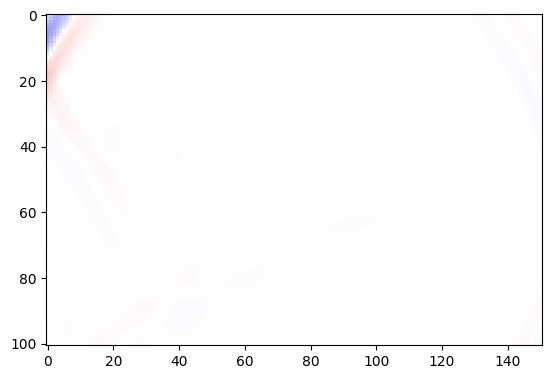

In [8]:
u2 = ReadWavefield(model)
val = 1e-4
plt.imshow(u2.transpose(), cmap="bwr", clim=[-val,val])

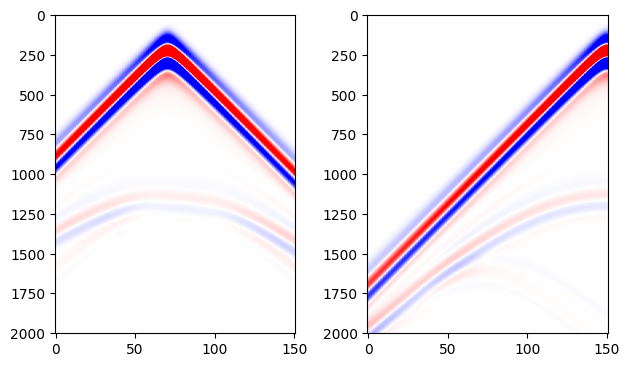

In [9]:
seis = ReadSeisMulti(model)
val = 1e-4
plt.subplot(121)
plt.imshow(seis[7].transpose(), cmap="bwr", clim=[-val,val], aspect=0.1)
plt.subplot(122)
plt.imshow(seis[-1].transpose(), cmap="bwr", clim=[-val,val], aspect=0.1)
plt.tight_layout()